In [1]:
import numpy as np
from pomegranate import *
import pandas as pd

import missingno as msno

import seaborn as sns
sns.set_style("white")
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Data/data_rms_bearing_1.txt', header = None, sep='\s+')

# remove column 8
data = data.drop([8], axis=1)
data.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


# Details Dataset
- Recording Duration:  October 22, 2003 12:06:24 to November 25, 2003 23:39:56 
- No. of Files: 2,156 
- No. of Channels:  8  
- Channel Arrangement:  Bearing 1 – Ch 1&2; Bearing 2 – Ch 3&4;   Bearing 3 – Ch 5&6; Bearing 4 – Ch 7&8. 
- File Recording Interval:  Every 10 minutes (except the first 43 files were taken every 5 minutes) 
- File Format:  ASCII 
- Description: At the end of the test-to-failure experiment, inner race defect occurred in bearing 3 and roller element defect in bearing 4. 

In [3]:
# create list minutes
minutes = []
start = 0
for t in range(len(data)):
    # Every 10 minutes (except the first 43 files were taken every 5 minutes) 
    minutes.append(start)
    if t <= 43: 
        start += 5
    else:
        start += 20

In [4]:
# add into dataframe
se = pd.Series(minutes)
data['Time'] = se.values

In [5]:
data.head()

,0,1,2,3,4,5,6,7,Time
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520,0
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855,5
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333,10
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027,15
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291,20


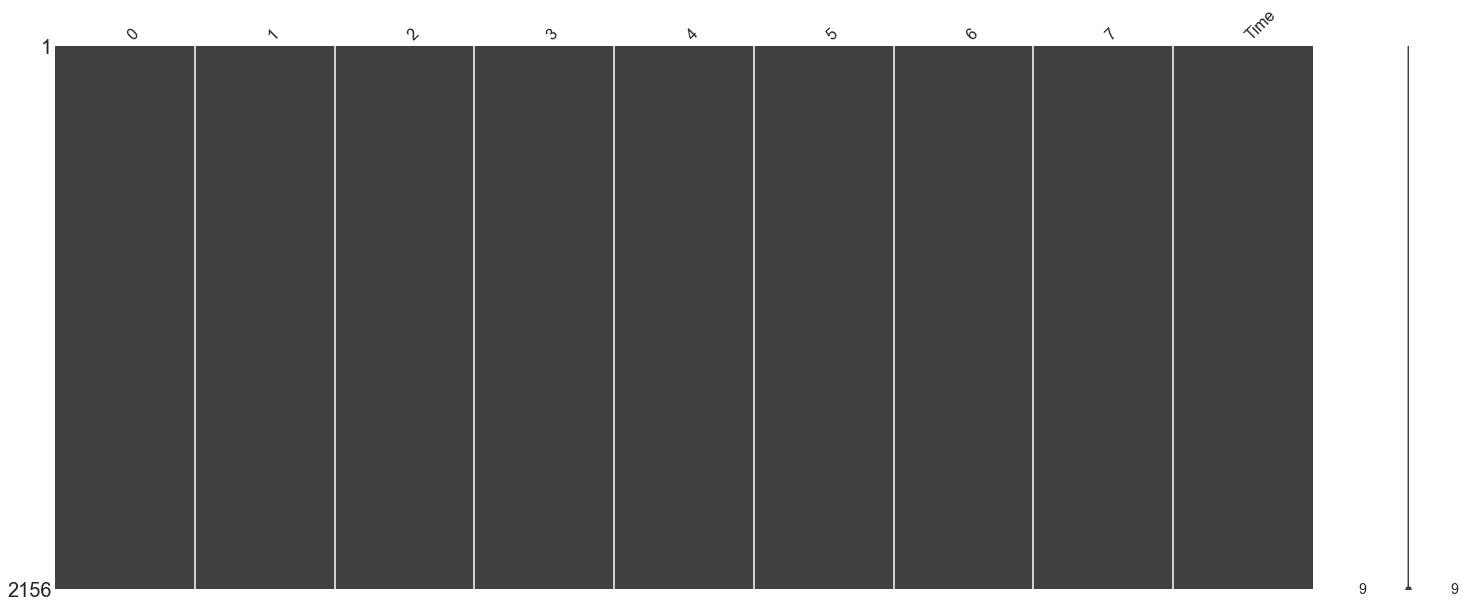

In [6]:
msno.matrix(data)

[Text(0.5,0,'Time (min)')]

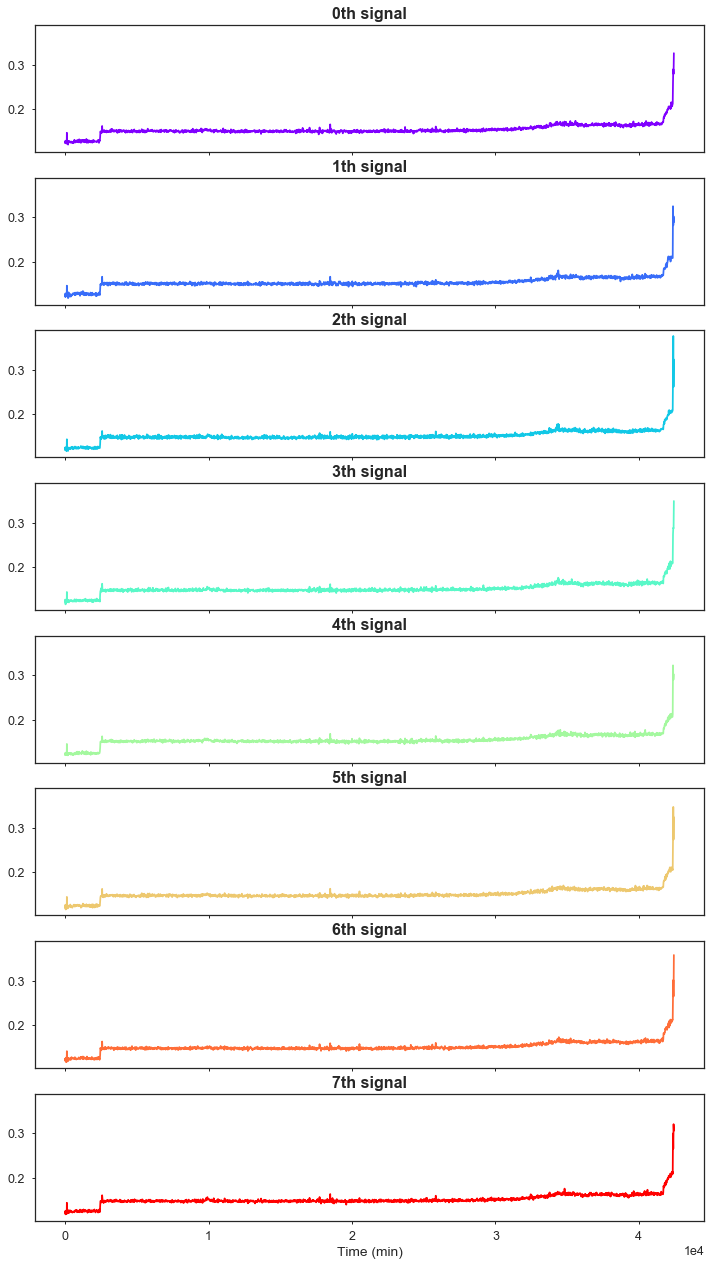

In [7]:
# draw plot of each signals
sns.set(font_scale=1.25)
style_kwds = {'xtick.major.size': 3, 'ytick.major.size': 3,
              'legend.frameon': True}
sns.set_style('white', style_kwds)

fig, axs = plt.subplots(8, sharex=True, sharey=True, figsize=(12,22))
colors = cm.rainbow(np.linspace(0, 1, 8))

for i, (ax, color) in enumerate(zip(axs, colors)):
    # use fancy indexing to plot data in each state
    mask = data.Time == i
    ax.plot(data.Time,
            data[i],
            c=color)
    ax.set_title("{0}th signal".format(i), fontsize=16, fontweight='demi')
    plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
ax.set(xlabel='Time (min)')

# Mixture of Gaussians

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [9]:
from sklearn.mixture import GaussianMixture

In [10]:
features = [0, 1, 2, 3, 4, 5, 6, 7]
X = data[features]
X.head()

,0,1,2,3,4,5,6,7
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291


In [11]:
gmm = GaussianMixture(n_components=3).fit(X.values)
states = gmm.predict(X.values)

In [12]:
# add into dataframe
data['states'] = states
data.head()

,0,1,2,3,4,5,6,7,Time,states
0,0.124086,0.123077,0.124692,0.123098,0.121993,0.120885,0.120650,0.122520,0,1
1,0.125157,0.121047,0.119458,0.121360,0.123017,0.120512,0.123048,0.122855,5,1
2,0.125133,0.125864,0.122109,0.126549,0.124533,0.121847,0.120396,0.123333,10,1
3,0.125903,0.122256,0.125582,0.123162,0.122565,0.122018,0.124485,0.125027,15,1
4,0.123719,0.128365,0.121615,0.123504,0.119830,0.126062,0.123403,0.122291,20,1


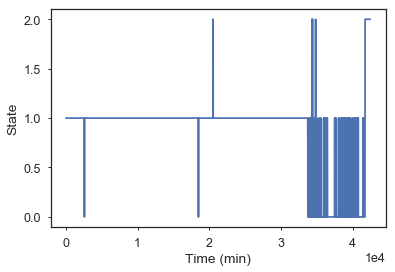

In [13]:
plt.plot(data['Time'], data['states'])
plt.xlabel('Time (min)')
plt.ylabel('State')
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.show()

# Library https://github.com/aehuynh/hidden-markov-model/
## Data observation sequence harus integer

In [14]:
import numpy as np

class HMM:
    """
    Order 1 Hidden Markov Model
    Attributes
    -------|---
    A : numpy.ndarray
        State transition probability matrix
    B: numpy.ndarray
        Output emission probability matrix with shape(N, number of output types)
    pi: numpy.ndarray
        Initial state probablity vector
    Common Variables
    ----------------
    obs_seq : list of int
        list of observations (represented as ints corresponding to output
        indexes in B) in order of appearance
    T : int
        number of observations in an observation sequence
    N : int
        number of states
    """

    def __init__(self, A, B, pi):
        self.A = A
        self.B = B
        self.pi = pi

    def _forward(self, obs_seq):
        N = self.A.shape[0]
        T = len(obs_seq)

        F = np.zeros((N,T))
        print(obs_seq[0])
        F[:,0] = self.pi * self.B[:, obs_seq[0]]

        for t in range(1, T):
            for n in range(N):
                F[n,t] = np.dot(F[:,t-1], (self.A[:,n])) * self.B[n, obs_seq[t]]

        return F

    def _backward(self, obs_seq):
        N = self.A.shape[0]
        T = len(obs_seq)

        X = np.zeros((N,T))
        X[:,-1:] = 1

        for t in reversed(range(T-1)):
            for n in range(N):
                X[n,t] = np.sum(X[:,t+1] * self.A[n,:] * self.B[:, obs_seq[t+1]])

        return X

    def observation_prob(self, obs_seq):
        """ P( entire observation sequence | A, B, pi ) """
        return np.sum(self._forward(obs_seq)[:,-1])

    def state_path(self, obs_seq):
        """
        Returns
        -------
        V[last_state, -1] : float
            Probability of the optimal state path
        path : list(int)
            Optimal state path for the observation sequence
        """
        V, prev = self.viterbi(obs_seq)

        # Build state path with greatest probability
        last_state = np.argmax(V[:,-1])
        path = list(self.build_viterbi_path(prev, last_state))

        return V[last_state,-1], reversed(path)

    def viterbi(self, obs_seq):
        """
        Returns
        -------
        V : numpy.ndarray
            V [s][t] = Maximum probability of an observation sequence ending
                       at time 't' with final state 's'
        prev : numpy.ndarray
            Contains a pointer to the previous state at t-1 that maximizes
            V[state][t]
        """
        N = self.A.shape[0]
        T = len(obs_seq)
        prev = np.zeros((T - 1, N), dtype=int)

        # DP matrix containing max likelihood of state at a given time
        V = np.zeros((N, T))
        V[:,0] = self.pi * self.B[:,obs_seq[0]]

        for t in range(1, T):
            for n in range(N):
                seq_probs = V[:,t-1] * self.A[:,n] * self.B[n, obs_seq[t]]
                prev[t-1,n] = np.argmax(seq_probs)
                V[n,t] = np.max(seq_probs)

        return V, prev

    def build_viterbi_path(self, prev, last_state):
        """Returns a state path ending in last_state in reverse order."""
        T = len(prev)
        yield(last_state)
        for i in range(T-1, -1, -1):
            yield(prev[i, last_state])
            last_state = prev[i, last_state]

    def baum_welch_train(self, obs_seq):
        N = self.A.shape[0]
        T = len(obs_seq)

        forw = self._forward(obs_seq)
        back = self._backward(obs_seq)

        # P( entire observation sequence | A, B, pi )
        obs_prob = np.sum(forw[:,-1])
        if obs_prob <= 0:
            raise ValueError("P(O | lambda) = 0. Cannot optimize!")

        xi = np.zeros((T-1, N, N))
        for t in range(xi.shape[0]):
            xi[t,:,:] = self.A * forw[:,[t]] * self.B[:,obs_seq[t+1]] * back[:, t+1] / obs_prob

        gamma = forw * back / obs_prob

        # Gamma sum excluding last column
        gamma_sum_A = np.sum(gamma[:,:-1], axis=1, keepdims=True)
        # Vector of binary values indicating whether a row in gamma_sum is 0.
        # If a gamma_sum row is 0, save old rows on update
        rows_to_keep_A =  (gamma_sum_A == 0)
        # Convert all 0s to 1s to avoid division by zero
        gamma_sum_A[gamma_sum_A == 0] = 1.
        next_A = np.sum(xi, axis=0) / gamma_sum_A


        gamma_sum_B = np.sum(gamma, axis=1, keepdims=True)
        rows_to_keep_B = (gamma_sum_B == 0)
        gamma_sum_B[gamma_sum_B == 0] = 1.

        obs_mat = np.zeros((T, self.B.shape[1]))
        obs_mat[range(T),obs_seq] = 1
        next_B = np.dot(gamma, obs_mat) / gamma_sum_B

        # Update model
        self.A = self.A * rows_to_keep_A + next_A
        self.B = self.B * rows_to_keep_B + next_B
        self.pi = gamma[:,0] / np.sum(gamma[:,0])

In [15]:
dat1 = list(data[0].values)

In [16]:
n = 3 # number of states

# pi initial probability
pitmp = np.random.random_sample((n))
pi = np.array(pitmp / sum(pitmp), dtype=np.double)

# transition matrix
atmp = np.random.random_sample((n, n))
row_sums = atmp.sum(axis=1)
A = np.array(atmp / row_sums[:, np.newaxis], dtype=np.double)

# emmision matrix
btmp = np.random.random_sample((n, 2156))
row_sums = btmp.sum(axis=1)
B = np.array(btmp / row_sums[:, np.newaxis], dtype=np.double)

# Pomegranate

In [17]:
from pomegranate import *

In [18]:
from pomegranate import *

sunny = State( DiscreteDistribution({'umbrella': 0.1, 'not': 0.9}), name='sunny' )
rainy = State( DiscreteDistribution({'umbrella': 0.8, 'not': 0.2}), name='rainy' )
foggy = State( DiscreteDistribution({'umbrella': 0.3, 'not': 0.7}), name='foggy' )

model = HiddenMarkovModel()
model.add_states(sunny, rainy, foggy)

model.add_transition(model.start, sunny, 0.33)
model.add_transition(model.start, rainy, 0.33)
model.add_transition(model.start, foggy, 0.34)

model.add_transition(sunny, sunny, 0.8)
model.add_transition(sunny, rainy, 0.05)
model.add_transition(sunny, foggy, 0.15)

model.add_transition(rainy, sunny, 0,2)
model.add_transition(rainy, rainy, 0.6)
model.add_transition(rainy, foggy, 0.2)

model.add_transition(foggy, sunny, 0.2)
model.add_transition(foggy, rainy, 0.3)
model.add_transition(foggy, foggy, 0.5)
model.bake()

In [59]:
import numpy as np
from pomegranate import *

seq = np.array([[1,1,2,1,2,2,3,1,2,2,3,3,3,1,3,2]])
transmat = np.array([[0.6, 0.4], [0.5, 0.5]])
start_probs = np.array([0.5, 0.5])

states = [NormalDistribution(0,1), NormalDistribution(0,1)]

model = HiddenMarkovModel.from_matrix(transmat, states, start_probs, merge = 'None')
model.fit(seq, max_iterations=10, stop_threshold=1e-6, verbose=True)

t, e = model.forward_backward(seq[0])

print ("transition matrix")
print (model.dense_transition_matrix()[:model.silent_start, :model.silent_start])
print ("\nfb transitions")
print (t)
print ("\nfb emissions")
print (e)

[1] Improvement: 32.76164321399869	Time (s): 0.0
[2] Improvement: 0.001987498409320665	Time (s): 0.0009978
[3] Improvement: 0.003393866538413448	Time (s): 0.0009985
[4] Improvement: 0.0061979235827998025	Time (s): 0.0
[5] Improvement: 0.01140683294132927	Time (s): 0.0
[6] Improvement: 0.02070586273549324	Time (s): 0.0
[7] Improvement: 0.03637774641621405	Time (s): 0.0
[8] Improvement: 0.060257411055729904	Time (s): 0.0
[9] Improvement: 0.09095308666048751	Time (s): 0.0009966
[10] Improvement: 0.12143455806106829	Time (s): 0.0
Total Training Improvement: 33.11435800039955
Total Training Time (s): 0.0110
transition matrix
[[0.6707 0.3293]
 [0.5172 0.4828]]

fb transitions
[[5.9887 2.6497 0.     0.    ]
 [3.2804 3.0811 0.     0.    ]
 [0.0168 0.9832 0.     0.    ]
 [0.     0.     0.     0.    ]]

fb emissions
[[-4.0889 -0.0169]
 [-1.2137 -0.3525]
 [-0.6203 -0.7718]
 [-0.9672 -0.4783]
 [-0.5265 -0.8932]
 [-0.4414 -1.0303]
 [-0.2416 -1.5387]
 [-0.8742 -0.5399]
 [-0.5153 -0.9096]
 [-0.4298 -

In [20]:
import numpy; numpy.set_printoptions(suppress=True, precision=4)
from pomegranate import *

X = [numpy.random.randn(10) for i in range(100)]
model = HiddenMarkovModel.from_samples(NormalDistribution, 3, X, max_iterations=5)

print(X[0])
# print(model.dense_transition_matrix()[model.start_index]) # start transitions
# print(model.dense_transition_matrix()[:model.silent_start, :model.silent_start]) # transition matrix

[ 1.7641  0.4002  0.9787  2.2409  1.8676 -0.9773  0.9501 -0.1514 -0.1032
  0.4106]


# NASA Bearing with Pomegranate

In [21]:
X = list(data[0])

d1 = GeneralMixtureModel([NormalDistribution(5, 2), NormalDistribution(5, 4)])
d2 = GeneralMixtureModel([NormalDistribution(15, 1), NormalDistribution(15, 5)])

s1 = State(d1, name="GMM1")
s2 = State(d2, name="GMM2")
# print(d1)
model = HiddenMarkovModel()
model.add_states(s1, s2)
model.add_transition(model.start, s1, 0.75)
model.add_transition(model.start, s2, 0.25)
model.add_transition(s1, s1, 0.85)
model.add_transition(s1, s2, 0.15)
model.add_transition(s2, s2, 0.90)
model.add_transition(s2, s1, 0.10)
model.bake()

model.dense_transition_matrix()
print(set(model.predict(X)))
# print (model.predict_proba(X))

{0}


In [43]:
from pomegranate import *
dists = [NormalDistribution(0, 1), NormalDistribution(0, 1), NormalDistribution(0,1)]
trans_mat = numpy.array([[0.7, 0.3, 0.0],
                         [0.0, 0.8, 0.2],
                         [0.0, 0.0, 0.9]])
starts = numpy.array([1.0, 0.0, 0.0])
ends = numpy.array([0.0, 0.0, 0.1])
model = HiddenMarkovModel.from_matrix(trans_mat, dists, starts, ends)

In [44]:
model.dense_transition_matrix()[model.start_index]

array([1., 0., 0., 0., 0.])

In [24]:
X = list(data[0])

d1 = GeneralMixtureModel([NormalDistribution(5, 2), NormalDistribution(5, 4)])
d2 = GeneralMixtureModel([NormalDistribution(15, 1), NormalDistribution(15, 5)])
d3 = GeneralMixtureModel([NormalDistribution(15, 1), NormalDistribution(15, 5)])

s1 = State(d1, name="GMM1")
s2 = State(d2, name="GMM2")
s3 = State(d3, name="GMM3")
# print(d1)
model = HiddenMarkovModel()
model.add_states(s1, s2)
model.add_transition(model.start, s1, 0.75)
model.add_transition(model.start, s2, 0.25)
model.add_transition(s1, s1, 0.85)
model.add_transition(s1, s2, 0.15)
model.add_transition(s2, s2, 0.90)
model.add_transition(s2, s1, 0.10)
model.bake()

model.dense_transition_matrix()

array([[0.85, 0.15, 0.  , 0.  ],
       [0.1 , 0.9 , 0.  , 0.  ],
       [0.75, 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  ]])

In [25]:
import pomegranate

In [26]:
def multivariate_gaussian_distribution_diag(num_mix, dim_feature):
    """multivariate gaussian diag covar"""
    guassianDiag = []
    for ii in range(dim_feature):
        guassianDiag.append(pomegranate.distributions.NormalDistribution(np.random.normal(0.0, 1.0, 1)[0], 1.0))
    return guassianDiag


def create_mixture_diag_covar(n_mix, dim_feature):
    """diag covar mixture"""
    mixtures = [pomegranate.distributions.IndependentComponentsDistribution(multivariate_gaussian_distribution_diag(i, dim_feature)) for i in range(n_mix)]
    return mixtures


def create_mixture_full_covar(n_mix, dim_feature):
    """full covar mixture"""
    mixtures = [pomegranate.distributions.MultivariateGaussianDistribution(np.random.normal(0.0, 1.0, dim_feature),
                                                                           np.identity(dim_feature)) for i in
                range(n_mix)]
    return mixtures


def create_state(n_mix, dim_feature, name_phn, name_state, covar_type='full'):
    """full covar GMM"""
    if covar_type == 'full':
        mixtures = create_mixture_full_covar(n_mix=n_mix, dim_feature=dim_feature)
    elif covar_type == 'diag':
        mixtures = create_mixture_diag_covar(n_mix=n_mix, dim_feature=dim_feature)
    else:
        raise ValueError("{} is not a valid covar type.".format(covar_type))

    state = pomegranate.State(pomegranate.GeneralMixtureModel(mixtures), name=name_phn + name_state)
    return state


def create_hmm(n_mix, dim_feature, name_phn, covar_type='full'):
    # Create model with 3 states
    # Left-to-right: each state is connected to itself and its direct successor

    state_0 = create_state(n_mix=n_mix,
                           dim_feature=dim_feature,
                           name_phn=name_phn,
                           name_state='-first',
                           covar_type=covar_type)
    state_1 = create_state(n_mix=n_mix,
                           dim_feature=dim_feature,
                           name_phn=name_phn,
                           name_state='-mid',
                           covar_type=covar_type)
    state_2 = create_state(n_mix=n_mix,
                           dim_feature=dim_feature,
                           name_phn=name_phn,
                           name_state='-last',
                           covar_type=covar_type)

    model = pomegranate.HiddenMarkovModel(name_phn)

    model.add_state(state_0)
    model.add_state(state_1)
    model.add_state(state_2)

    model.add_transition(model.start, state_0, 1.0)
    model.add_transition(state_0, state_0, 0.5)
    model.add_transition(state_0, state_1, 0.5)
    model.add_transition(state_1, state_1, 0.5)
    model.add_transition(state_1, state_2, 0.5)
    model.add_transition(state_2, state_2, 0.5)
    model.add_transition(state_2, model.end, 0.5)

    model.bake()
    return model

In [27]:
moghmm = create_hmm(n_mix=2, dim_feature=1, name_phn='a')

In [28]:
moghmm.dense_transition_matrix()[:model.silent_start, :model.silent_start]

array([[0.5, 0. ],
       [0. , 0.5]])

In [34]:
from pomegranate import *
from pomegranate import MultivariateGaussianDistribution as MGD
import numpy as np

n = 104

def create_hmm():
    # Create model with 3 states
    # Left-to-right: each state is connected to itself and its direct successor
    model = HiddenMarkovModel()
    mixtures = [MGD(np.random.randn(n) + i, np.identity(n)) for i in range(4) ]
#     print(mixtures)
    midState = State(GeneralMixtureModel(mixtures), name="mid")

    model.add_state(midState)

    model.add_transition( model.start, midState, 1.0 )
    model.add_transition( midState, midState, 0.8 )
    model.add_transition( midState, model.end, 0.2 )

    model.bake()
    return model

sequences = [ numpy.random.randn(10, n) + i % 4 for i in range(200) ]

print(np.shape(sequences))
model = create_hmm()
print("----------")
print("Custom Seq")
print("----------")
# model.fit(sequences)

# print (model.sample())

(200, 10, 104)
----------
Custom Seq
----------


In [35]:
from pomegranate import *

In [58]:
import numpy as np
from pomegranate import *

seq = [data[0].values]
transmat = np.array([[0.6, 0.2, 0.2], [0.5, 0.3, 0.2], [0.1, 0.6, 0.3]])
start_probs = np.array([0.5, 0.3, 0.2])

states = [NormalDistribution(0,1), NormalDistribution(0,1), NormalDistribution(0,1)]

model = HiddenMarkovModel.from_matrix(transmat, states, start_probs, merge = 'None')
# model.fit(seq, max_iterations=1000, stop_threshold=1e-6, verbose=True)

emmision, transition = model.forward_backward(seq[0])

print("transition matrix")
print(model.dense_transition_matrix()[:model.silent_start, :model.silent_start])
print("pi")
print(model.dense_transition_matrix()[model.start_index, :model.silent_start])
print(np.shape(transition))
# print(transition)

transition matrix
[[0.6 0.2 0.2]
 [0.5 0.3 0.2]
 [0.1 0.6 0.3]]
pi
[0.5 0.3 0.2]
(2156, 3)


In [47]:
seq = np.array([[1,1,2,1,2,2,3,1,2,2,3,3,3,1,3,2]])
print(seq)

[[1 1 2 1 2 2 3 1 2 2 3 3 3 1 3 2]]
